In [ ]:
from tensorflow.keras.layers import Conv2D , Input , SeparableConv2D , Add , Dense , BatchNormalization , ReLU , MaxPool2D , GlobalAvgPool2D

In [ ]:
from tensorflow.keras import Model

In [ ]:
NUMBER_OF_CLASSES = 1000
INPUT_SHAPE = (299,299,3)

In [ ]:
def conv_bn(x , filters , kernel_size , strides=1) :
    x = Conv2D(filters=filters ,
               kernel_size=kernel_size,
               strides=strides,
               padding="same",
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
def sepr_bn(x , filters , kernel_size , strides=1) :
    x = SeparableConv2D(filters=filters ,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding="same" ,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
def entry_flow(x):
    x = conv_bn(x , filters=32 , kernel_size=3 , strides=2)
    x = ReLU()(x)
    x = conv_bn(x , filters=64 , kernel_size=3)
    tensor = ReLU()(x)



    x = sepr_bn(tensor , filters=128 , kernel_size=3)
    x = ReLU()(x)
    x = sepr_bn(x , filters=128 , kernel_size=3)
    x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)



    tensor = conv_bn(tensor , filters=128 , kernel_size=1 , strides=2)
    x = Add()([tensor,x])

    x = ReLU()(x)
    x = sepr_bn(x , filters=256 , kernel_size=3)
    x = ReLU()(x)
    x = sepr_bn(x , filters=256 , kernel_size=3)
    x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)
    tensor = conv_bn(tensor , filters=256 , kernel_size=1 , strides=2)



    x = Add()([tensor,x])
    x = ReLU()(x)
    x = sepr_bn(x , filters=728 , kernel_size=3)
    x = ReLU()(x)
    x = sepr_bn(x , filters=728 , kernel_size=3)
    x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)
    tensor = conv_bn(tensor , filters=728 , kernel_size=1 , strides=2)
    x = Add()([tensor,x])
    return x

In [ ]:
def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sepr_bn(x , filters=728 , kernel_size=3)

        x = ReLU()(x)
        x = sepr_bn(x , filters=728 , kernel_size=3)

        x = ReLU()(x)
        x = sepr_bn(x , filters=728 , kernel_size=3)

        tensor = Add()([tensor,x])
    return tensor

In [ ]:
def exit_flow(tensor):
    x = ReLU()(tensor)
    x = sepr_bn(x , filters=728 , kernel_size=3)

    x = ReLU()(x)
    x = sepr_bn(x , filters=1024 , kernel_size=3)

    x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)

    tensor = conv_bn(tensor , filters=1024 , kernel_size=1 , strides=2)
    x = Add()([tensor , x])

    x = sepr_bn(x , filters=1536 , kernel_size=3)
    x = ReLU()(x)

    x = sepr_bn(x , filters=2048 , kernel_size=3)
    x = ReLU()(x)

    x = GlobalAvgPool2D()(x)

    x = Dense(units=NUMBER_OF_CLASSES , activation="softmax")(x)
    return x

In [ ]:
input_ = Input(shape=INPUT_SHAPE)
x = entry_flow(input_)
x = middle_flow(x)
output_ = exit_flow(x)
model = Model(inputs = input_ , outputs = output_)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 150, 150, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_146 (Batch  (None, 150, 150, 32  128        ['conv2d_32[0][0]']              
 Normalization)                 )                                                           

 Normalization)                                                                                   
                                                                                                  
 re_lu_127 (ReLU)               (None, 38, 38, 728)  0           ['batch_normalization_154[0][0]']
                                                                                                  
 separable_conv2d_119 (Separabl  (None, 38, 38, 728)  536536     ['re_lu_127[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 conv2d_36 (Conv2D)             (None, 19, 19, 728)  186368      ['batch_normalization_153[0][0]']
                                                                                                  
 batch_normalization_155 (Batch  (None, 38, 38, 728)  2912       ['separable_conv2d_119[0][0]']   
 Normaliza

 re_lu_135 (ReLU)               (None, 19, 19, 728)  0           ['batch_normalization_163[0][0]']
                                                                                                  
 separable_conv2d_127 (Separabl  (None, 19, 19, 728)  536536     ['re_lu_135[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 batch_normalization_164 (Batch  (None, 19, 19, 728)  2912       ['separable_conv2d_127[0][0]']   
 Normalization)                                                                                   
                                                                                                  
 re_lu_136 (ReLU)               (None, 19, 19, 728)  0           ['batch_normalization_164[0][0]']
                                                                                                  
 separable

 separable_conv2d_136 (Separabl  (None, 19, 19, 728)  536536     ['re_lu_144[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 batch_normalization_173 (Batch  (None, 19, 19, 728)  2912       ['separable_conv2d_136[0][0]']   
 Normalization)                                                                                   
                                                                                                  
 re_lu_145 (ReLU)               (None, 19, 19, 728)  0           ['batch_normalization_173[0][0]']
                                                                                                  
 separable_conv2d_137 (Separabl  (None, 19, 19, 728)  536536     ['re_lu_145[0][0]']              
 eConv2D)                                                                                         
          

                                                                                                  
 conv2d_37 (Conv2D)             (None, 10, 10, 1024  745472      ['add_52[0][0]']                 
                                )                                                                 
                                                                                                  
 batch_normalization_182 (Batch  (None, 19, 19, 1024  4096       ['separable_conv2d_145[0][0]']   
 Normalization)                 )                                                                 
                                                                                                  
 batch_normalization_183 (Batch  (None, 10, 10, 1024  4096       ['conv2d_37[0][0]']              
 Normalization)                 )                                                                 
                                                                                                  
 max_pooli

In [ ]:
import numpy as np
import tensorflow.keras.backend as k

In [ ]:
np.sum([k.count_params(p) for p in model.trainable_weights])

22855952

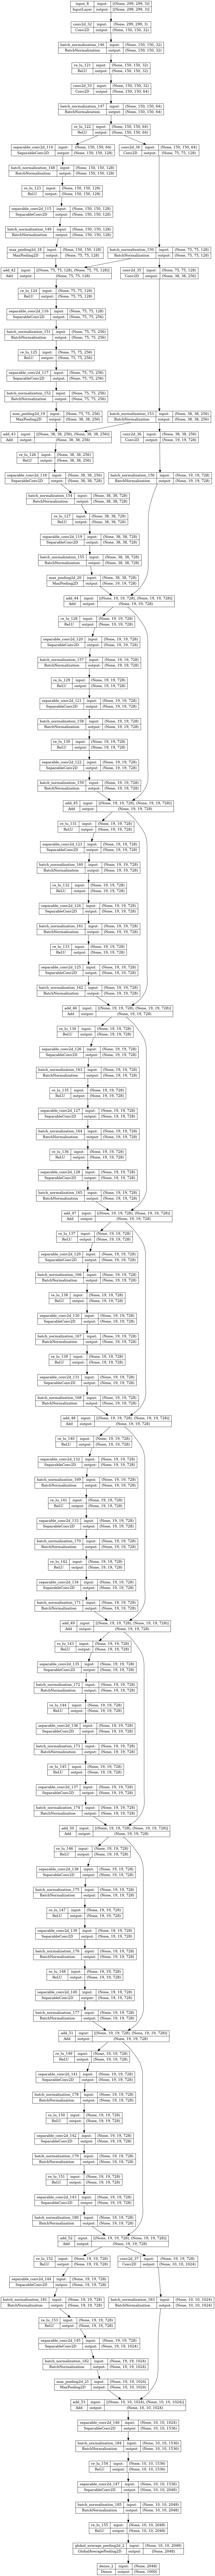

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model ,show_shapes=True)